In [1]:
#Rajesh Tata (12596189) -- PDS_Assignment_3

# Importing required packages into colab labaratory
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import io

# Importing packages required for conducting sentiment analysis
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
nltk.download("popular")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data] 

True

In [5]:
# Importing RawData set into colab and creating a data frame
raw_df = pd.read_csv('/Corona_NLP_test.csv')

In [6]:
raw_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [7]:
raw_df.tail(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative
3797,3798,48750,"Arlington, Virginia",16-03-2020,I and @ForestandPaper members are committed to...,Extremely Positive


In [9]:
raw_df.shape

(3798, 6)

In [10]:
raw_df.isnull()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3793,False,False,False,False,False,False
3794,False,False,False,False,False,False
3795,False,False,False,False,False,False
3796,False,False,True,False,False,False


In [11]:
raw_df.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

<Axes: >

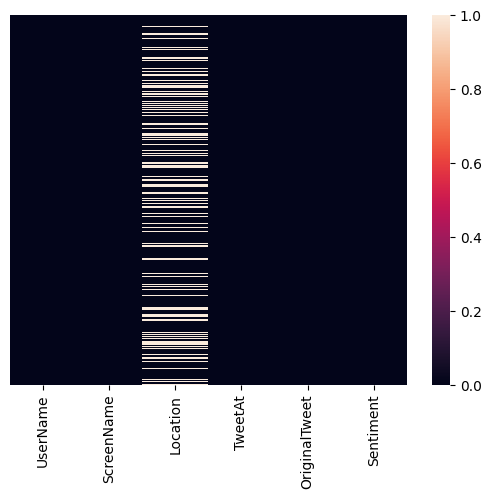

In [12]:
sns.heatmap(raw_df.isnull(), yticklabels = False)

In [13]:
# As we can observe, there are null values in 'Location' variable
# Therefore dropping null values in data frame
raw_df.dropna(inplace = True)

In [14]:
#checking again
raw_df.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

<Axes: >

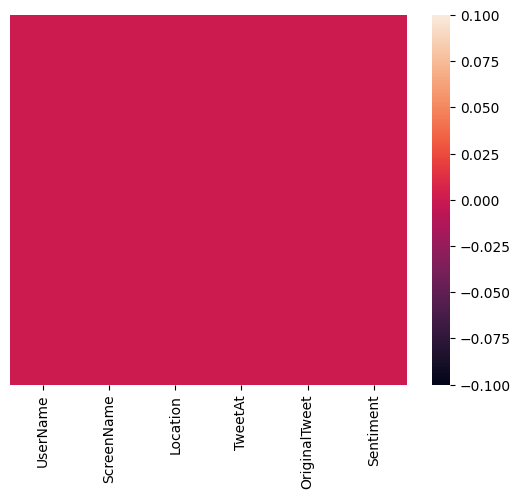

In [15]:
# Checking it with heatmap
sns.heatmap(raw_df.isnull(), yticklabels = False)

In [16]:
raw_df = raw_df.drop(['UserName'], axis=1)

In [17]:
raw_df.index= pd.RangeIndex(start=1, stop=1+len(raw_df), step=1)

In [18]:
raw_df.to_csv('cleanedData_Corona_NLP_test.csv',index=False)

In [19]:
#Data Analysis
OriginalTweet_df = raw_df['OriginalTweet']

In [20]:
OriginalTweet_df.head()

1    TRENDING: New Yorkers encounter empty supermar...
2    When I couldn't find hand sanitizer at Fred Me...
3    #Panic buying hits #NewYork City as anxious sh...
4    #toiletpaper #dunnypaper #coronavirus #coronav...
5    Do you remember the last time you paid $2.99 a...
Name: OriginalTweet, dtype: object

In [21]:
raw_df.head()

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
3,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
5,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral


In [22]:
# There are some of the messy values in the data frame 'Originaltweet'
# The messy values were in the form of special characters, and0 URL's
# Removing them using NLP tools
from nltk.corpus import stopwords
import re

stopwords = set(stopwords.words("english"))
corpus = []
for i in range(1, len(OriginalTweet_df)):
  review = re.sub(r"https?:[^\s]+", " " ,OriginalTweet_df[i])
  review = re.sub('[^a-zA-Z]',' ', review)
  review = review.lower()
  review = review.split()
  review = [word for word in review if not word in stopwords]
  review = ' '.join(review)
  corpus.append(review)

In [23]:
# Printing corpus values
print(corpus)

['trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn sold online grocers foodkick maxdelivery coronavirus fearing shoppers stock', 'find hand sanitizer fred meyer turned amazon pack purell check coronavirus concerns driving prices', 'panic buying hits newyork city anxious shoppers stock food amp medical supplies healthcare worker becomes bigapple st confirmed coronavirus patient bloomberg staged event qanon qanon qanon election cdc', 'toiletpaper dunnypaper coronavirus coronavirusaustralia coronavirusupdate covid news corvid newsmelb dunnypapergate costco one week everyone buying baby milk powder next everyone buying toilet paper', 'remember last time paid gallon regular gas los angeles prices pump going look coronavirus impacting prices pm abc', 'drtedros stop covid without protecting healthworkers prices surgical masks increased six fold n respirators trebled amp gowns cost twice much drtedros coronavirus', 'anyone supermarket last days went normal sho

In [24]:
# Saving corpus
f = open("output_corpus.txt", "w") 
print(corpus, file=f)
f.close()

In [25]:
# We should make the list to sentence for tokenizing the data
OriginalTweet_para = ' '.join(str(e) for e in corpus)

In [26]:
# Printing OriginalTweet_para
print(OriginalTweet_para)

trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn sold online grocers foodkick maxdelivery coronavirus fearing shoppers stock find hand sanitizer fred meyer turned amazon pack purell check coronavirus concerns driving prices panic buying hits newyork city anxious shoppers stock food amp medical supplies healthcare worker becomes bigapple st confirmed coronavirus patient bloomberg staged event qanon qanon qanon election cdc toiletpaper dunnypaper coronavirus coronavirusaustralia coronavirusupdate covid news corvid newsmelb dunnypapergate costco one week everyone buying baby milk powder next everyone buying toilet paper remember last time paid gallon regular gas los angeles prices pump going look coronavirus impacting prices pm abc drtedros stop covid without protecting healthworkers prices surgical masks increased six fold n respirators trebled amp gowns cost twice much drtedros coronavirus anyone supermarket last days went normal shop last night amp sig

In [27]:
# Saving it
f = open("output_OriginalTweet_para.txt", "w") 
print(OriginalTweet_para, file=f)
f.close()

In [28]:
# Conducting word tokenization
WordTokenize = nltk.word_tokenize(OriginalTweet_para)

# Printing the results
print(WordTokenize)

['trending', 'new', 'yorkers', 'encounter', 'empty', 'supermarket', 'shelves', 'pictured', 'wegmans', 'brooklyn', 'sold', 'online', 'grocers', 'foodkick', 'maxdelivery', 'coronavirus', 'fearing', 'shoppers', 'stock', 'find', 'hand', 'sanitizer', 'fred', 'meyer', 'turned', 'amazon', 'pack', 'purell', 'check', 'coronavirus', 'concerns', 'driving', 'prices', 'panic', 'buying', 'hits', 'newyork', 'city', 'anxious', 'shoppers', 'stock', 'food', 'amp', 'medical', 'supplies', 'healthcare', 'worker', 'becomes', 'bigapple', 'st', 'confirmed', 'coronavirus', 'patient', 'bloomberg', 'staged', 'event', 'qanon', 'qanon', 'qanon', 'election', 'cdc', 'toiletpaper', 'dunnypaper', 'coronavirus', 'coronavirusaustralia', 'coronavirusupdate', 'covid', 'news', 'corvid', 'newsmelb', 'dunnypapergate', 'costco', 'one', 'week', 'everyone', 'buying', 'baby', 'milk', 'powder', 'next', 'everyone', 'buying', 'toilet', 'paper', 'remember', 'last', 'time', 'paid', 'gallon', 'regular', 'gas', 'los', 'angeles', 'price

In [29]:
# Saving it
f = open("output_WordTokenize.txt", "w") 
print(WordTokenize, file=f)
f.close()

In [30]:
# Coutning word frequencies
fdist = FreqDist(WordTokenize)

In [31]:
# Priniting 15 most common words
fdist.most_common(15)

[('covid', 2275),
 ('coronavirus', 1196),
 ('food', 1050),
 ('store', 792),
 ('grocery', 624),
 ('people', 607),
 ('stock', 604),
 ('amp', 494),
 ('supermarket', 413),
 ('shopping', 412),
 ('online', 402),
 ('panic', 399),
 ('prices', 335),
 ('need', 291),
 ('toilet', 282)]

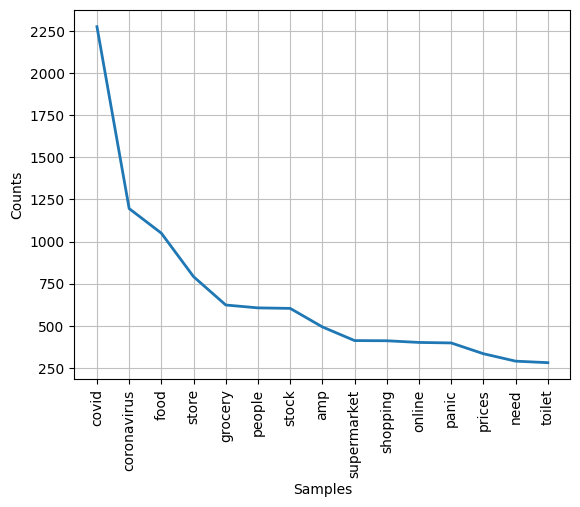

<Axes: xlabel='Samples', ylabel='Counts'>

In [32]:
# Plotting grequency distribution graph
plt.savefig("FrequencyDistGraph.png")
fdist.plot(15)

In [33]:
# Importing required libraries to create word cloud
from wordcloud import WordCloud, ImageColorGenerator
import requests
from PIL import Image

In [34]:
# Creating word cloud
wordcloud = WordCloud(background_color='white', height=1500, width=4000).generate(OriginalTweet_para)

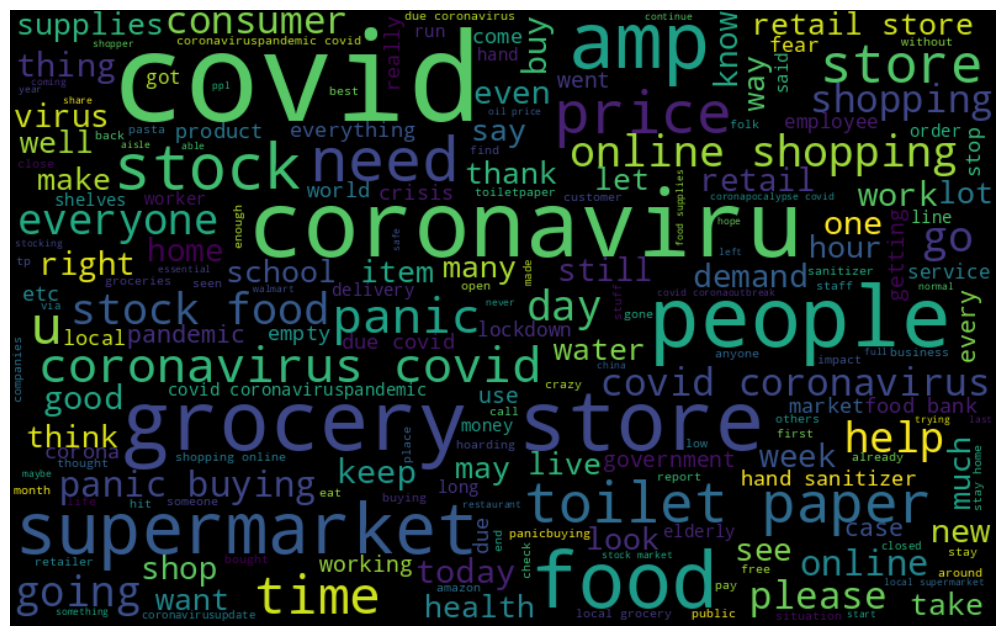

In [35]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 100).generate(OriginalTweet_para)

#plot the graph
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

#bigger the words..the most frequent it occurs

In [36]:
# Saving the image
plt.savefig("WordCloud.png") 

<Figure size 640x480 with 0 Axes>

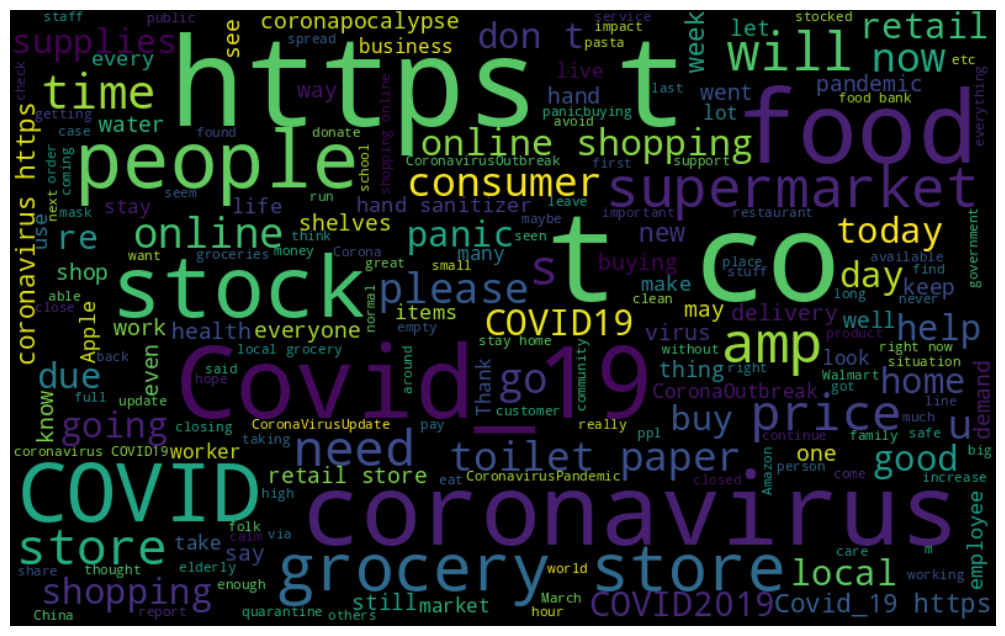

In [37]:
# Creating word cloud for positive words

all_words = " ".join([sentence for sentence in raw_df['OriginalTweet'][raw_df['Sentiment'] == 'Positive']])

wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

#plot the graph
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

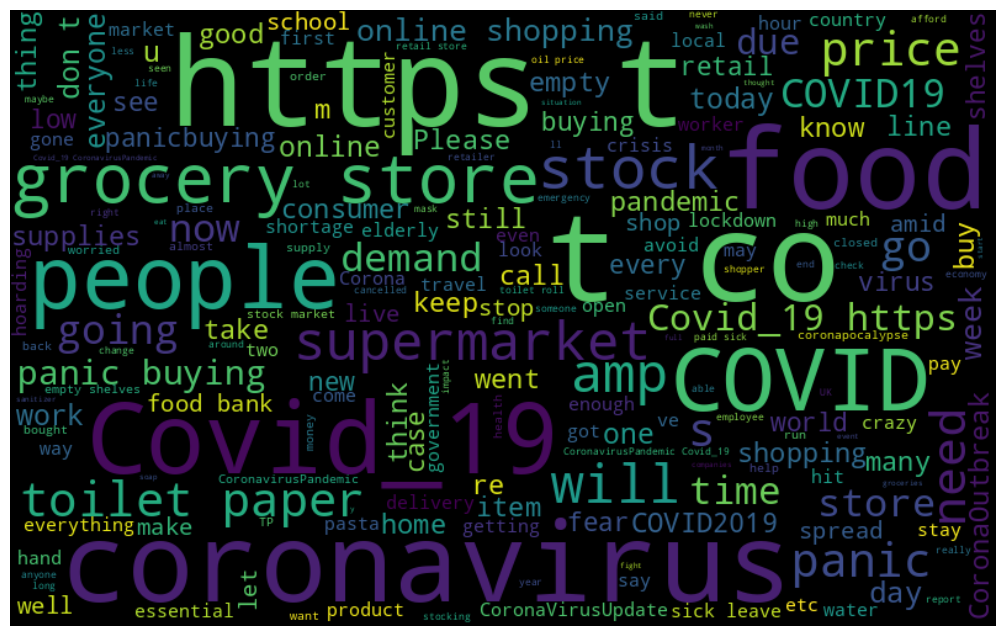

In [38]:
# Creating word cloud for positive words

all_words = " ".join([sentence for sentence in raw_df['OriginalTweet'][raw_df['Sentiment'] == 'Negative']])

wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

#plot the graph
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

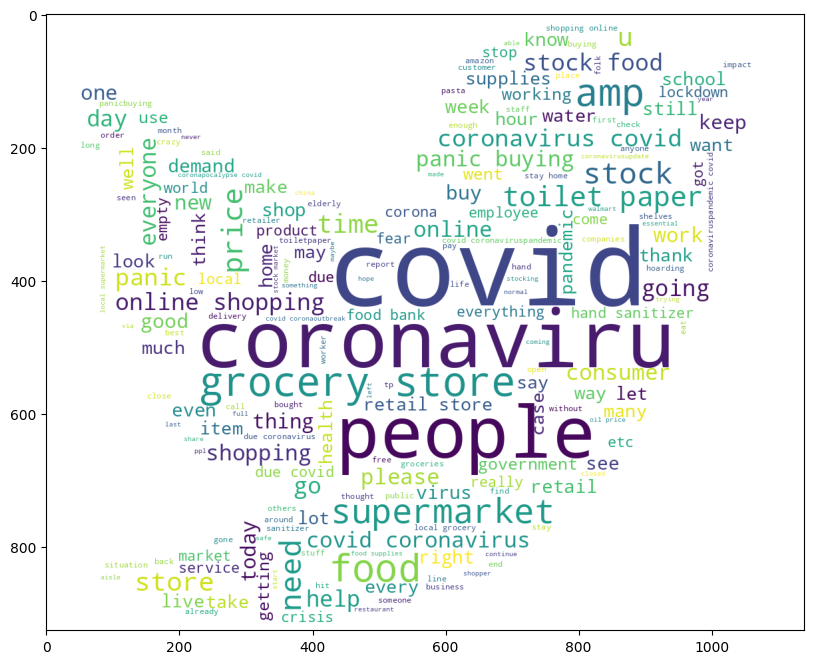

In [39]:
# Generating word cloud by masking twitter image
# Creating the mask image using web url
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)



# Creating word cloud separately for this image
wordcloud_bird = WordCloud(background_color='white', height=1500, width=4000,mask=Mask).generate(OriginalTweet_para)

#Plot the wordcloud :
plt.figure(figsize = (15, 8)) 
plt.imshow(wordcloud_bird) 
